In [5]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%run Data_manipulation.ipynb

In [42]:
# Isolation Forest

def detect_anomalies_isolation_forest(df, contamination=0.15, n_estimators=252, max_samples='auto', max_features=0.5):
    """
    Detect anomalies in a time series using Isolation Forest.

    Parameters:
    - df: DataFrame containing the time series data with a 'Close' column.
    - contamination: The proportion of anomalies in the data set.
    - n_estimators: The number of base estimators in the ensemble.
    - max_samples: The number of samples to draw from X to train each base estimator.
    - max_features: The number of features to draw from X to train each base estimator.

    Returns:
    - anomalies: DataFrame containing the detected anomalies.
    """
    # Selecting the 'Close' column for anomaly detection
    data = df['Close'].values.reshape(-1, 1)

    # Initialize Isolation Forest
    isolation_forest = IsolationForest(
        contamination=contamination,
        n_estimators=n_estimators,
        max_samples=max_samples,
        max_features=max_features,
        random_state=42
    )

    # Fit the model
    isolation_forest.fit(data)

    # Predict anomalies
    anomaly_labels = isolation_forest.predict(data)
    
    # Anomalies are labeled as -1
    anomalies = df[anomaly_labels == -1]

    # Plot the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomaly')
    plt.title('Time Series Data with Anomalies Detected using Isolation Forest')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return anomalies


# NIFTY

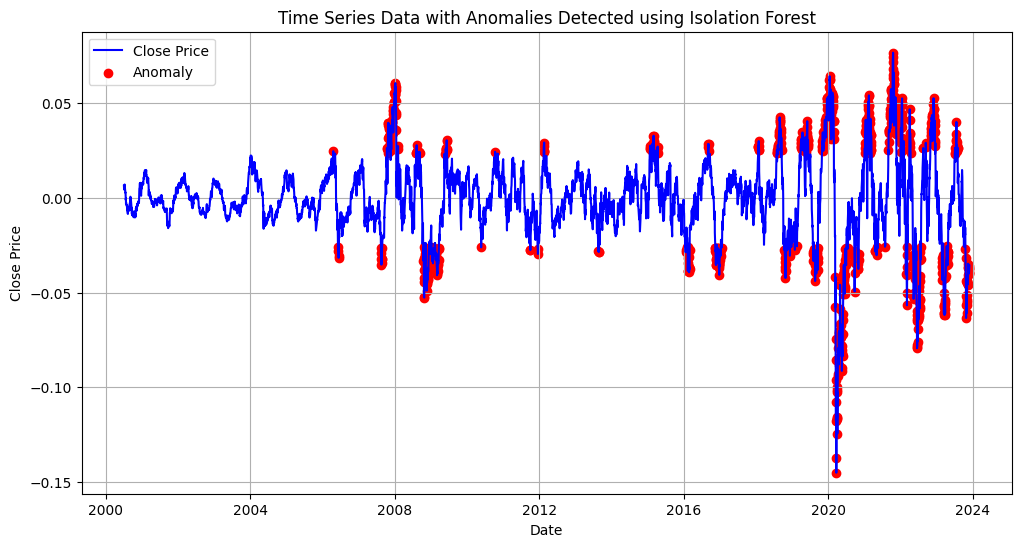

Anomalies:


,Close,Open,High,Low,Volume (in Billion)
Date,,,,,
2006-04-21,0.024671,0.023604,0.023449,0.023336,0.026852
2006-06-08,-0.027949,-0.021483,-0.023014,-0.028441,0.030987
2006-06-12,-0.025967,-0.021385,-0.022287,-0.024945,0.006765
2006-06-13,-0.030446,-0.025652,-0.026674,-0.030521,0.019718
2006-06-14,-0.031669,-0.030208,-0.026835,-0.032109,0.013438
...,...,...,...,...,...
2023-11-21,-0.037579,-0.037538,-0.038580,-0.034906,-0.051866
2023-11-22,-0.037141,-0.038078,-0.039235,-0.038410,-0.051526
2023-11-23,-0.039001,-0.037942,-0.038741,-0.035780,-0.058027


In [37]:
NIFTY = pd.read_csv('D:/UFG/Data collection/NIFTY.csv')
NIFTY['Date']= pd.to_datetime(NIFTY['Date'], format='%Y-%m-%d')
#NIFTY.set_index('Date', inplace=True)

scaled_data, scaler = scale_data(NIFTY)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data)

# Detect anomalies
anomalies = detect_anomalies_isolation_forest(df_residuals)

# Display anomalies (dates)
print("Anomalies:")
anomalies

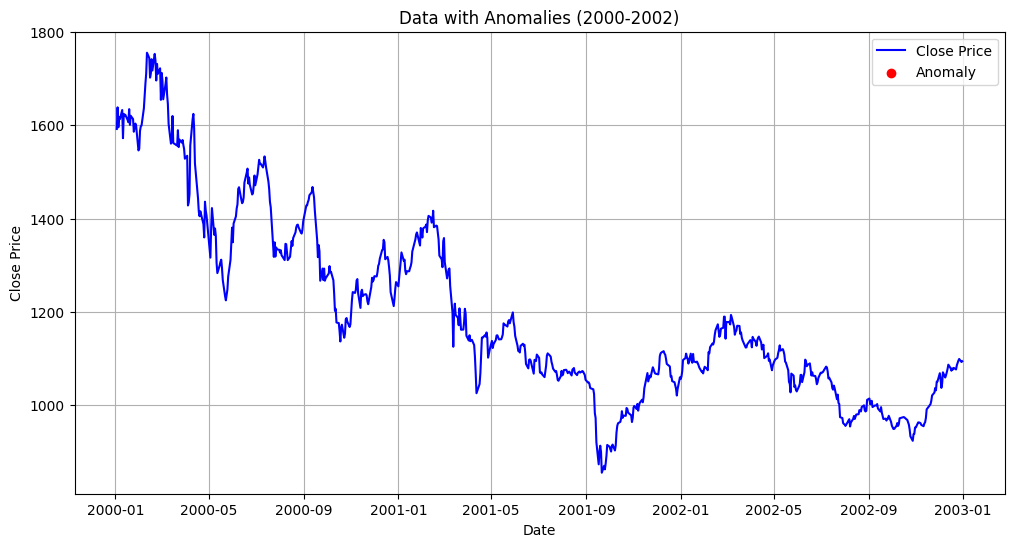

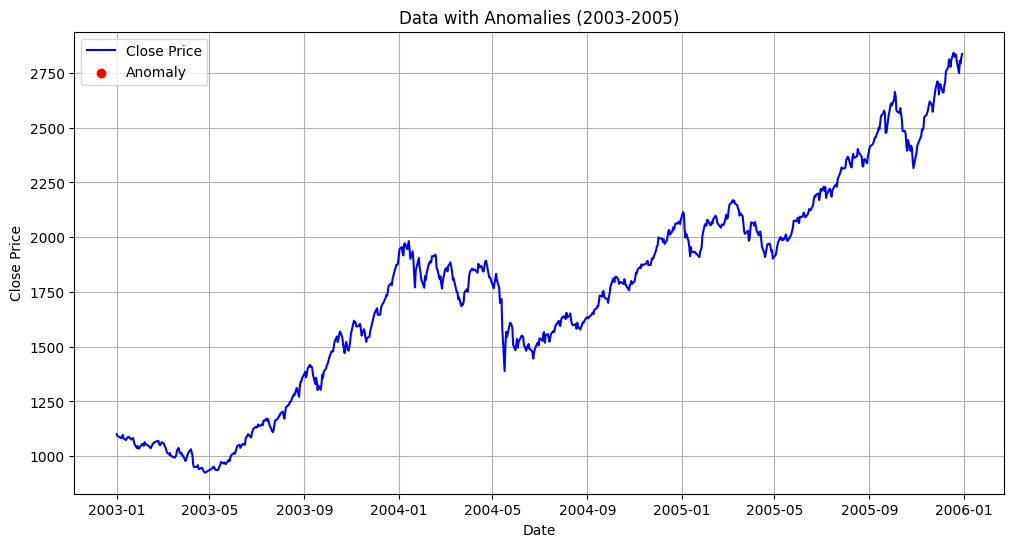

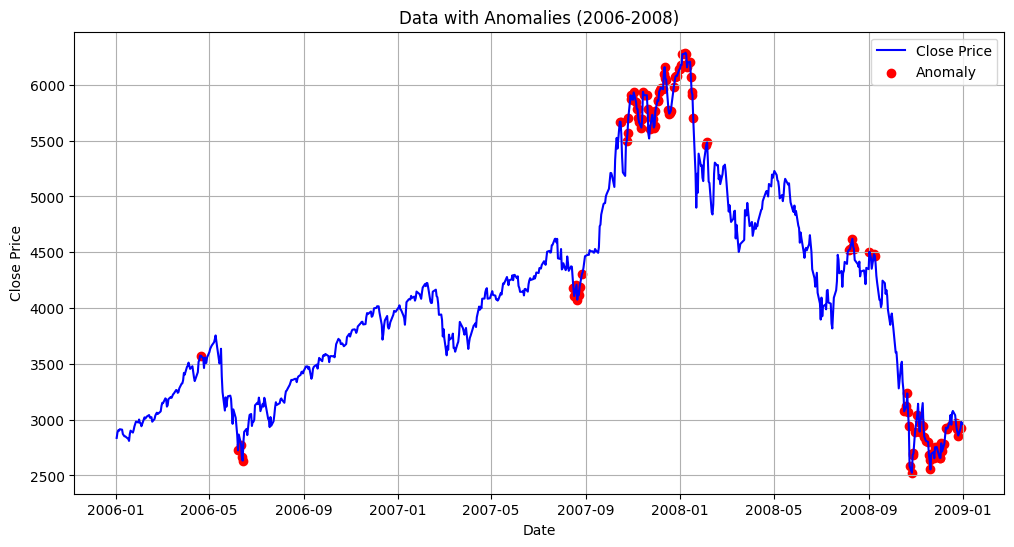

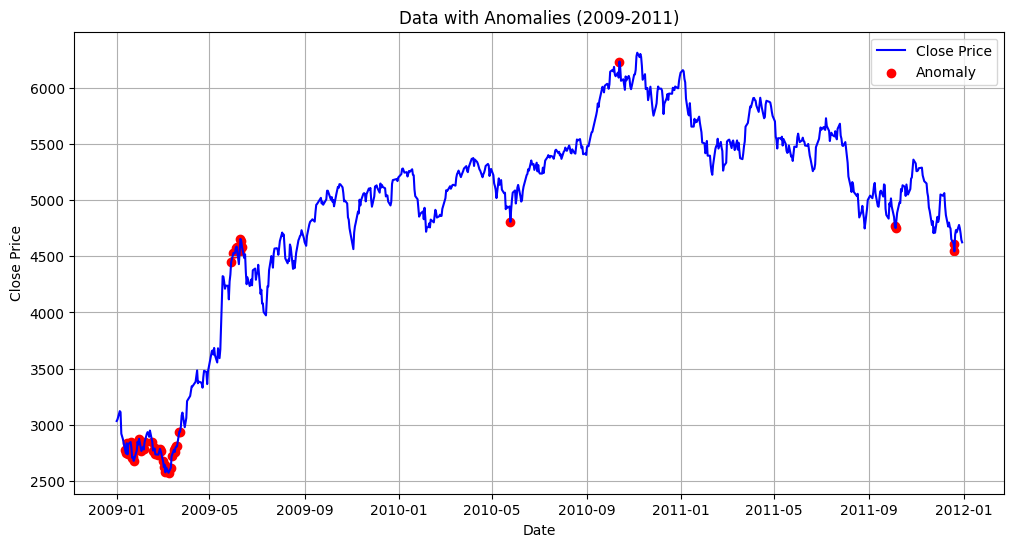

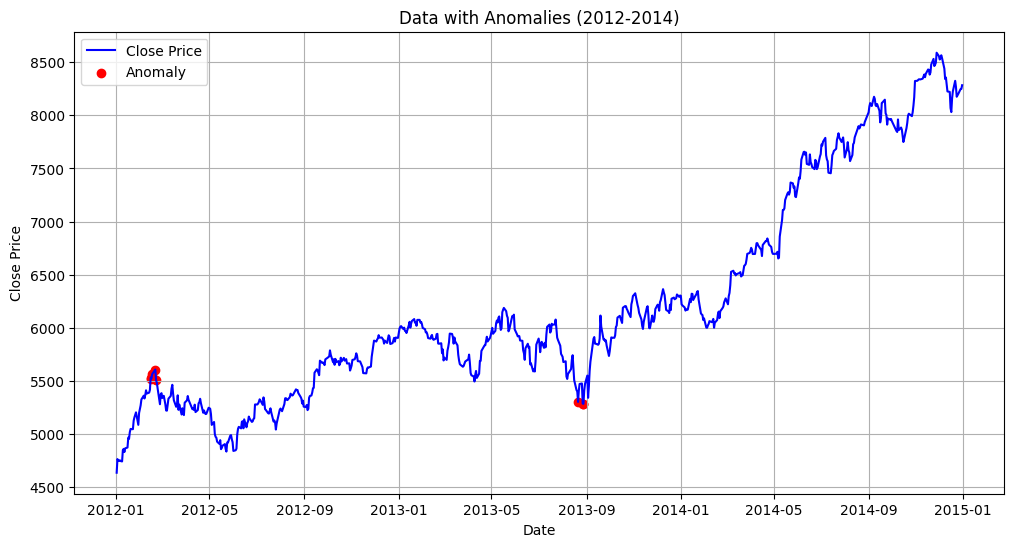

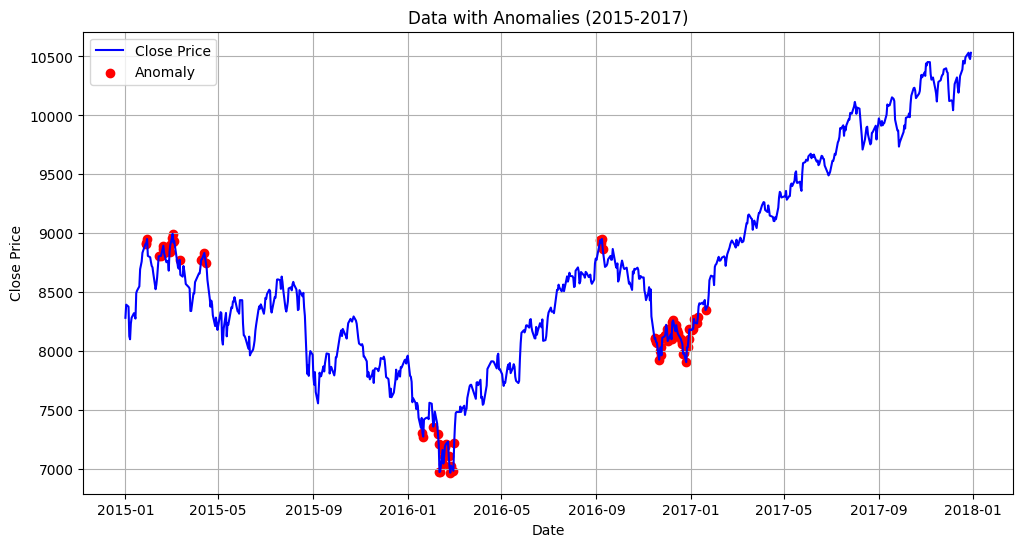

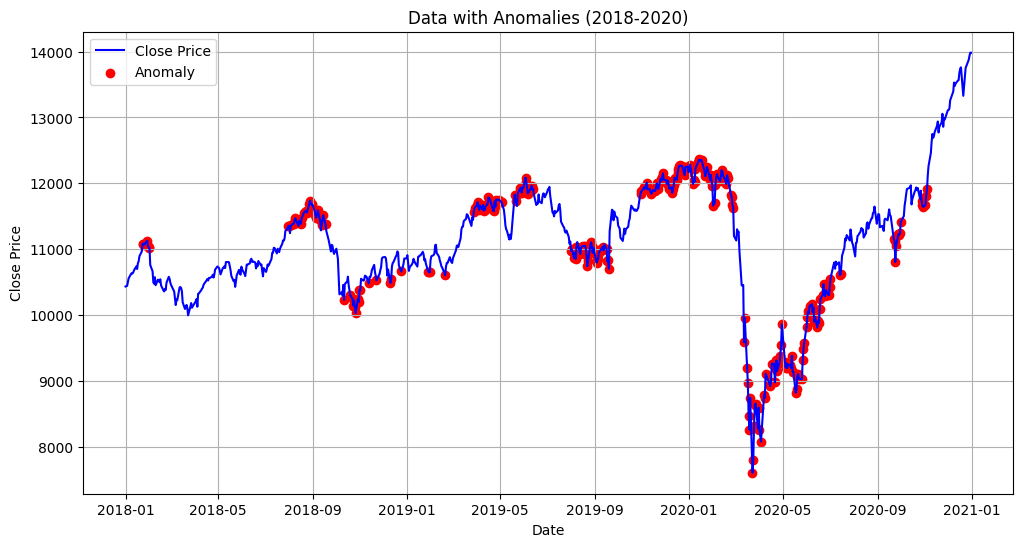

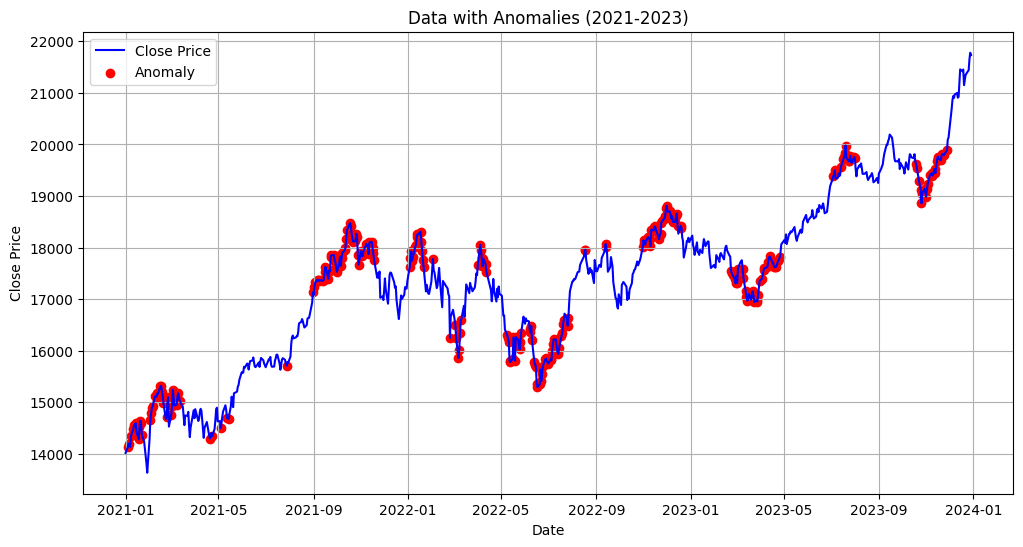

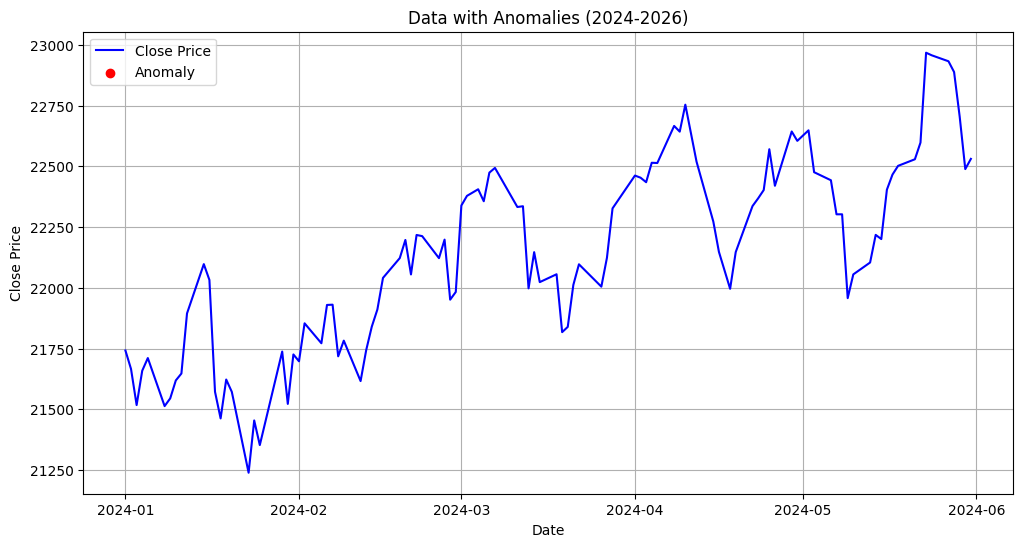

In [38]:
NIFTY_3 = plot_with_anomalies(NIFTY, anomalies, 3)

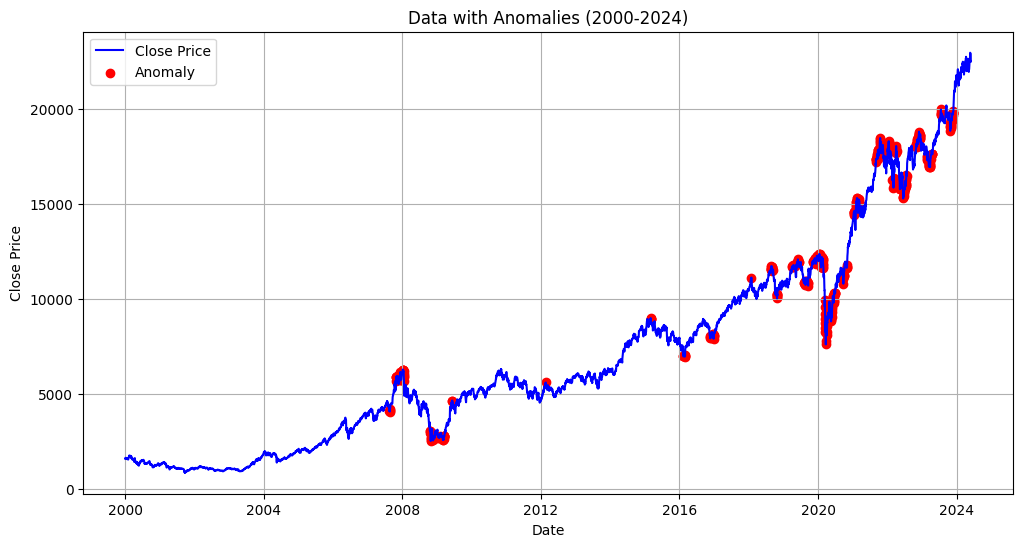

In [35]:
NIFTY_all = plot_with_anomalies(NIFTY, anomalies, 25)

# IBOVESPA

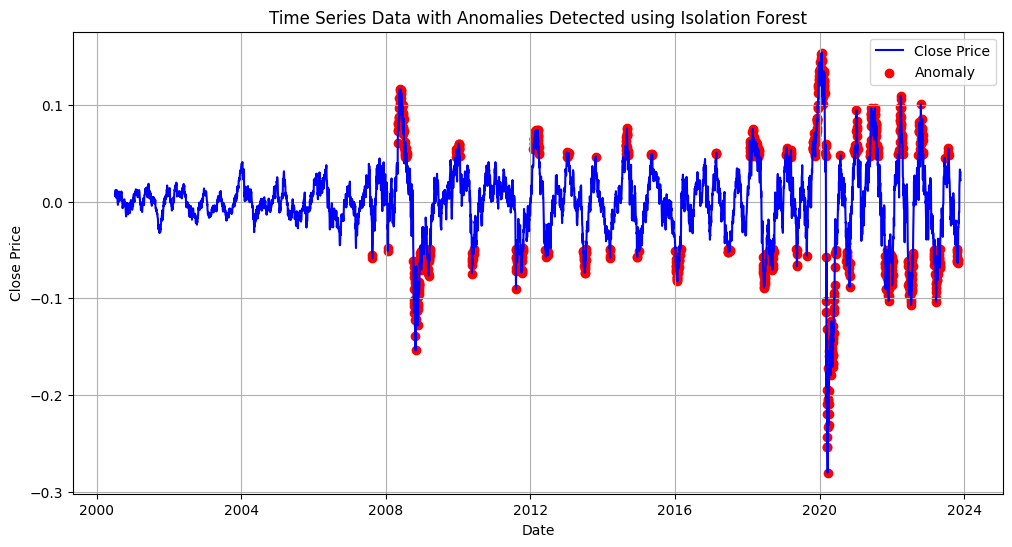

Anomalies:


,Open,High,Low,Close,Volume (in Million)
Date,,,,,
2007-08-16,-0.048141,-0.052953,-0.077444,-0.058693,0.173260
2007-08-17,-0.058571,-0.051680,-0.062734,-0.055114,0.069163
2008-01-21,-0.023977,-0.029010,-0.047659,-0.050994,-0.026294
2008-01-23,-0.032250,-0.038672,-0.050112,-0.047928,-0.023337
2008-04-30,0.028714,0.055163,0.036530,0.060693,-0.011775
...,...,...,...,...,...
2023-10-25,-0.056669,-0.058990,-0.057158,-0.062759,0.013231
2023-10-26,-0.062735,-0.053384,-0.057795,-0.048700,0.018519
2023-10-27,-0.048758,-0.050532,-0.056537,-0.059873,0.015573


In [39]:
# Detecting anomaly
IBOV = pd.read_csv('D:/UFG/Data collection/IBOV.csv')
IBOV['Date']= pd.to_datetime(IBOV['Date'], format='%Y-%m-%d')

scaled_data, scaler = scale_data(IBOV)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data)

# Detect anomalies
anomalies = detect_anomalies_isolation_forest(df_residuals)

# Display anomalies (dates)
print("Anomalies:")
anomalies

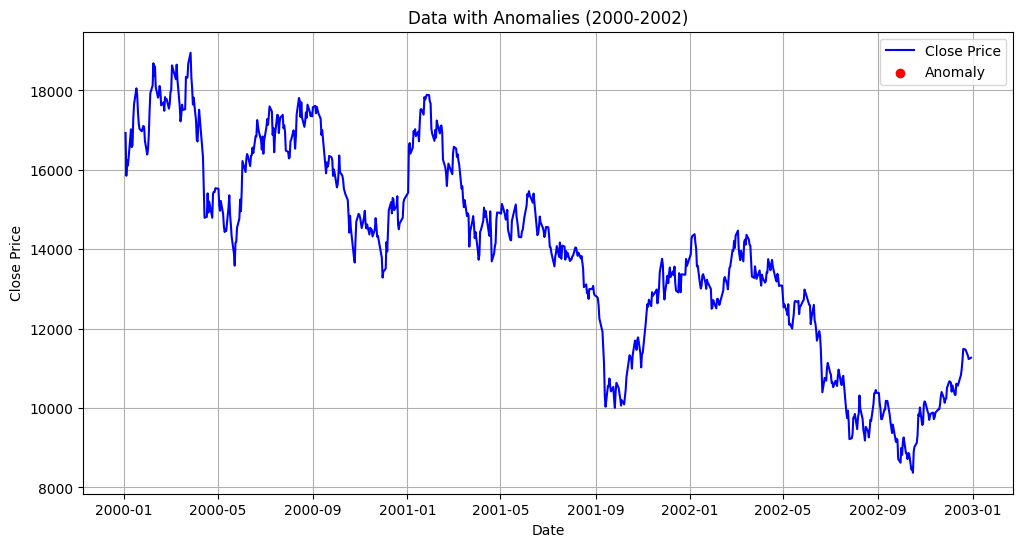

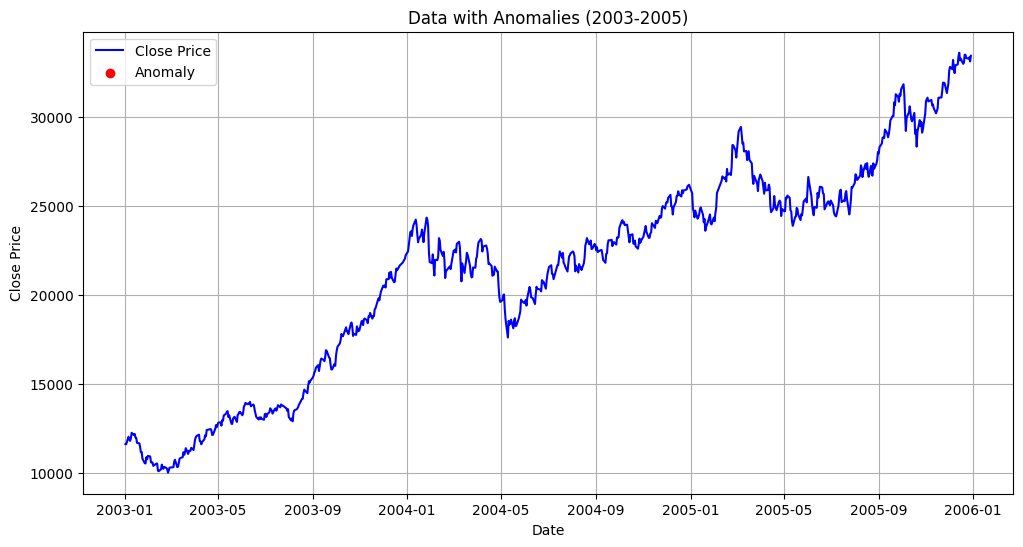

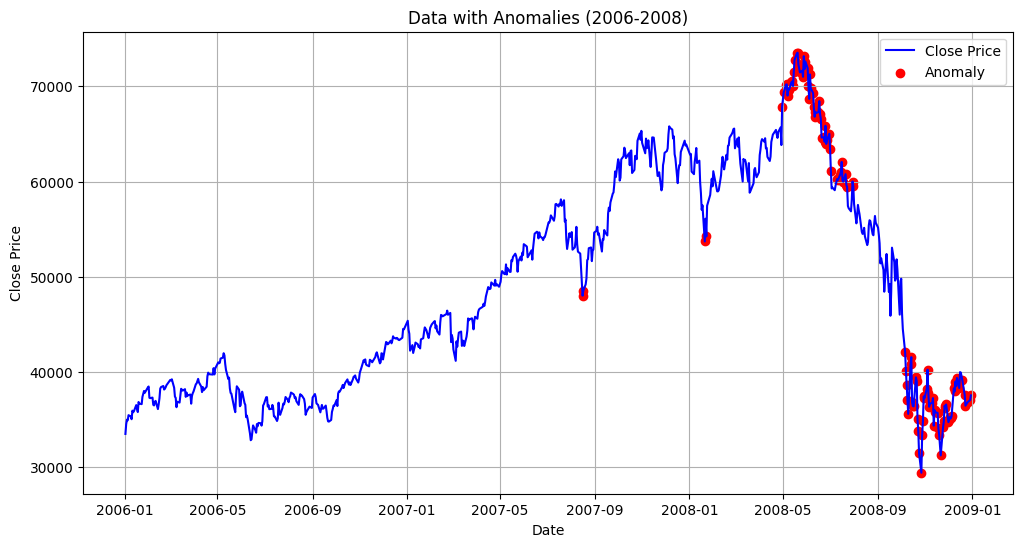

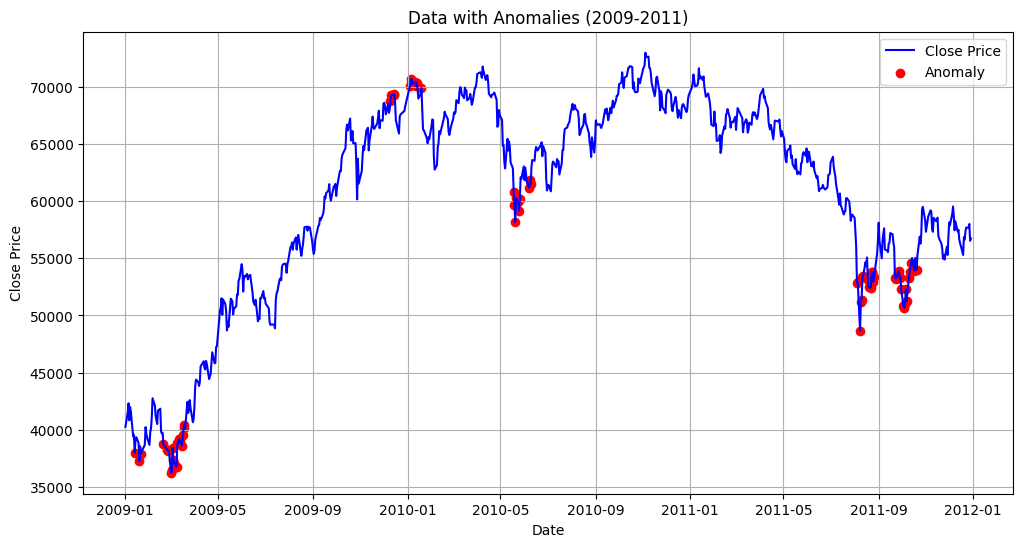

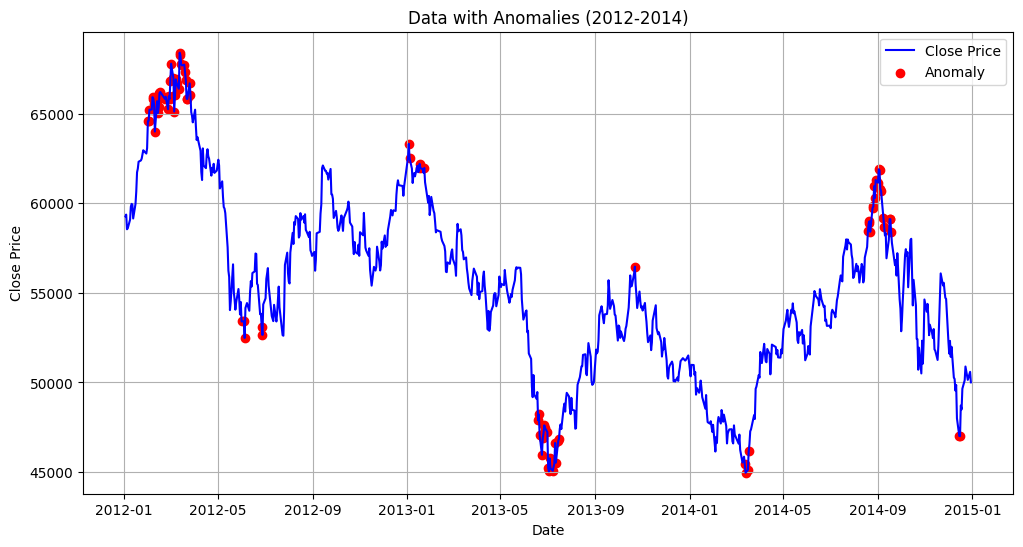

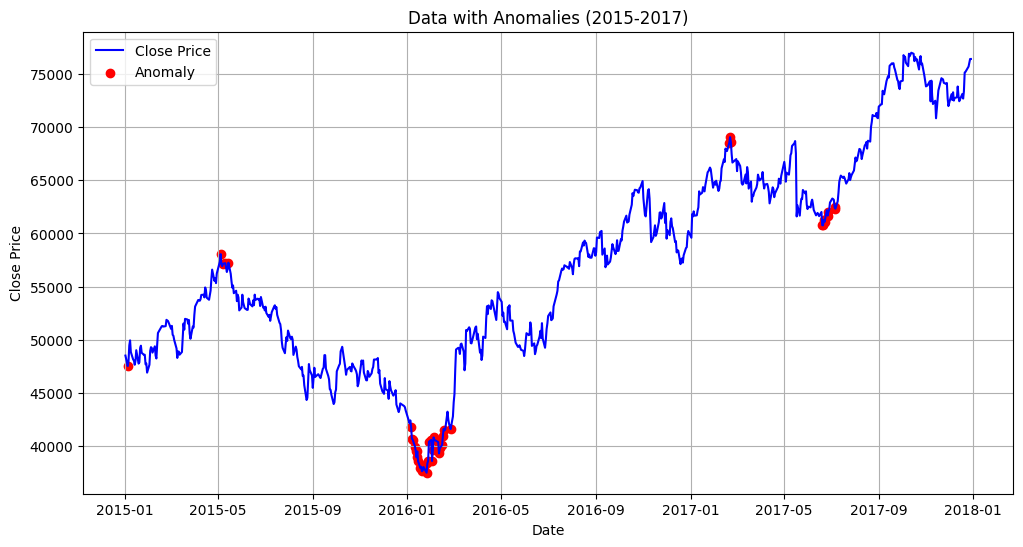

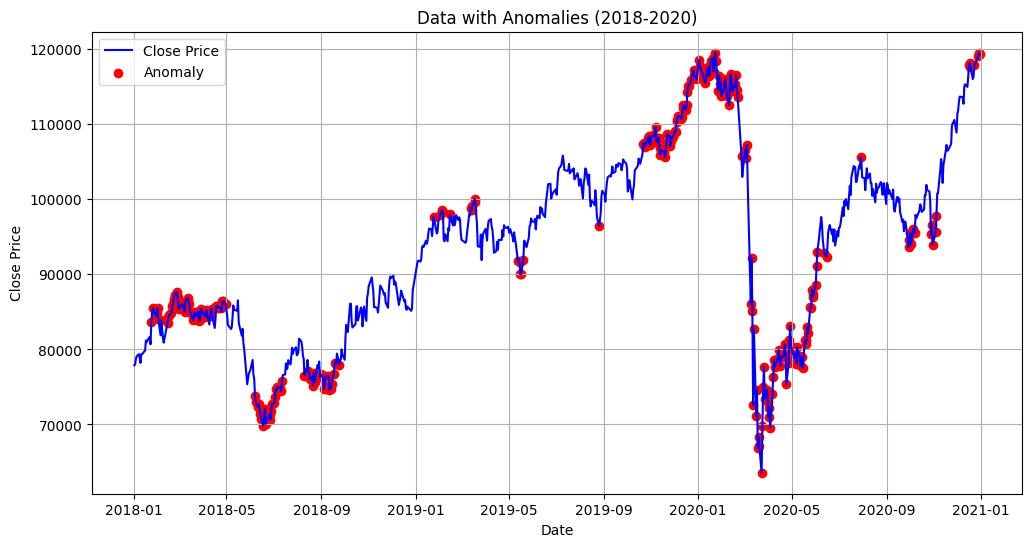

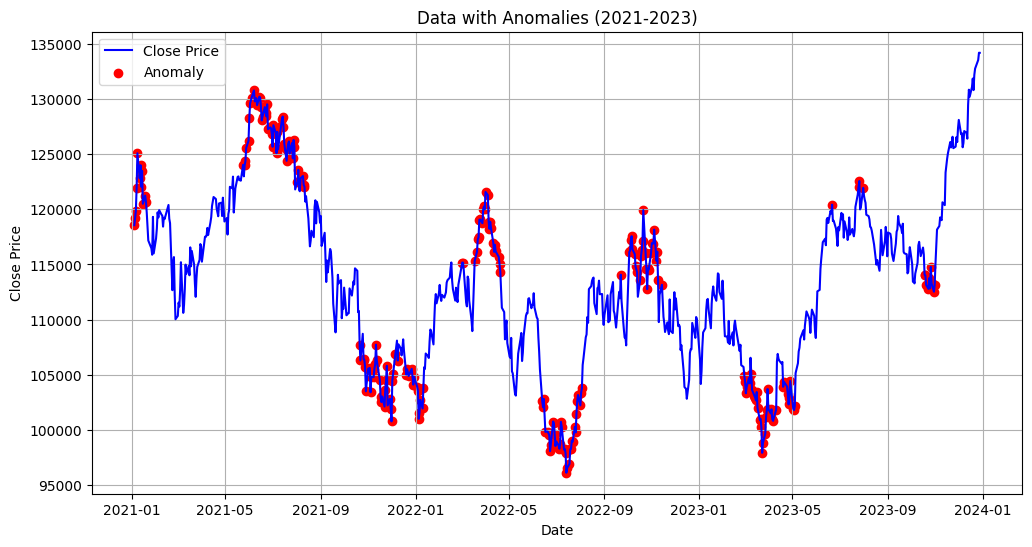

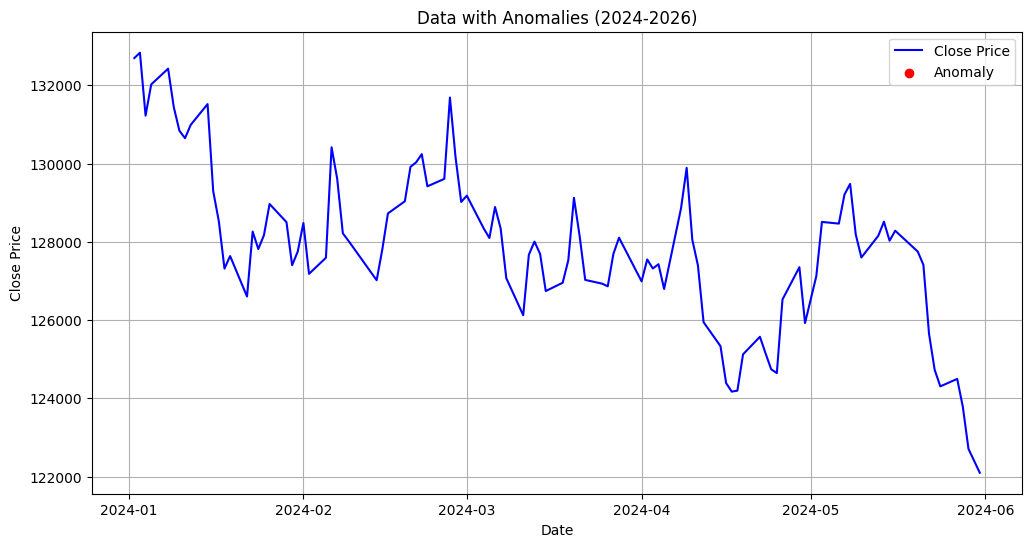

In [40]:
IBOV_3 = plot_with_anomalies(IBOV, anomalies, 3)

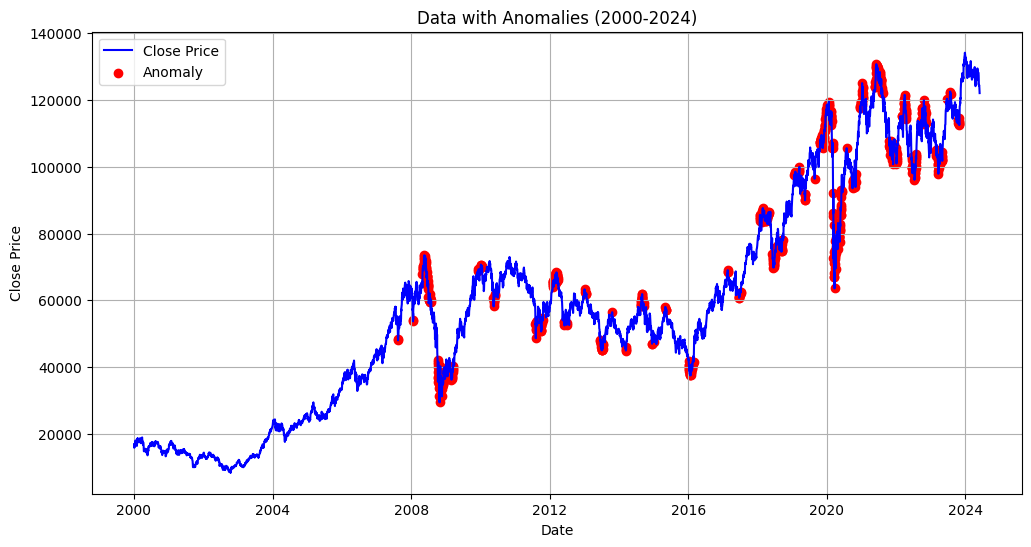

In [41]:
IBOV_all = plot_with_anomalies(IBOV, anomalies, 25)